# Práctica 1, Sesión 1: Datos y PCA

## 1. Datos

**Tareas del bloque 2 de Sistemas Inteligentes (SIN):**

* **Iris:** $\;C=3\,$ (setosa, versicolor y virgínica), $\,N=150\,$ ($50$ por clase), $\,D=4\,$ (longitud y amplitud de pétalos y sépalos)
* **Digits:** $\;C=10\,$ (dígitos del 0 al 9), $\,N=1797\,$ $\,D=64\,$ grises en $\{0,1,\dotsc,16\}$ de imágenes 8x8
* **Olivetti:** $\;C=40\,$ (persona, de 0 a 39), $\,N=400\,$ (10 por persona), $\,D=4096\,$ grises en $[0,1]$ de imágenes 64x64
* **Openml:** $\;$ repositorio de tareas de clasificación del que destacamos 3 "benchmark suites"
    * **OpenML-CC18 Curated Classification benchmark:** $\;$ sid 99, 72 tareas
    * **Tabular benchmark categorical classification:** $\;$ sid 334, 7 tareas
    * **AutoML Benchmark All Classification:** $\;$ sid 271, 71 tareas

**Ejercicio (para casa):** $\;$ Por cada una de las 153 tareas de SIN (iris, digits, olivetti, 72 OpenML-CC18, 7 Tabular y 71 AutoML), estima el error de regresión logística ajustado mediante sklearn con `clf = LogisticRegression(random_state=23).fit(X_train, y_train)`

<details><summary>Solución:</summary>

iris $0.0\%,\,$ digits $3.1\%,\,$ olivetti $0.0\%,\,$ [openml](https://github.com/josanna2/Bloque2_SIN2324/blob/main/TL_sesiones_de_laboratorio/S3_Regresi%C3%B3n_Log%C3%ADstica/openml.ipynb)

</details>

# 2. Análisis de componentes principales (PCA)

**Ejemplo:** $\;$ $N=4$ datos de $D=2$ dimensiones que queremos reducir a $\,K=1\,$ dimensión

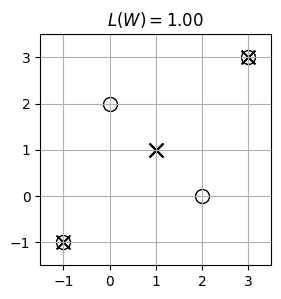

In [1]:
import numpy as np; import matplotlib.pyplot as plt
X = np.array([ [-1, -1], [0, 2], [2, 0], [3, 3] ]); N = len(X);
K = 1; _, _, Vt = np.linalg.svd(X - X.mean(0)); W = Vt[:K, :].T; Z = X @ W; hX = Z @ W.T
L = np.square(X - hX).sum(axis=1).mean()
fig, ax = plt.subplots(figsize=(3, 3)); ax.set_aspect("equal")
plt.axis([-1.5, 3.5, -1.5, 3.5]); plt.grid(True); ax.set_title(f'$L(W)={L:.2f}$')
plt.scatter(*X.T, facecolor='white', edgecolor='k', s=100)
plt.scatter(*hX.T, facecolor='black', s=100, marker='x');

[**Clase PCA de sklearn:**](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
* **Parámetros:** $\;$ `n_components` $\,=K,\,$ etc.
* **Atributos:** $\;$ `components_`, `explained_variance_`, `singular_values_`, `mean_`, `n_components`, `n_samples`, etc.
* **Métodos:** $\;$ `fit(X)`, `transform(X)`, `fit_transform(X)`, `inverse_transform(X)`, etc.

**Ejemplo (cont.):** $\;$ con sklearn, `n_components` $\,=K$

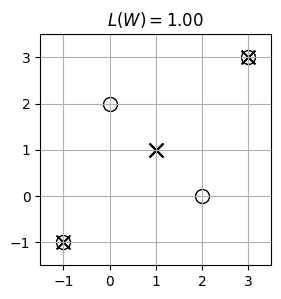

In [2]:
import numpy as np; import matplotlib.pyplot as plt; from sklearn.decomposition import PCA
X = np.array([ [-1, -1], [0, 2], [2, 0], [3, 3] ]); N = len(X)
K = 1; pca = PCA(n_components=K).fit(X); Z = pca.transform(X)
hX = pca.inverse_transform(Z); L = np.square(X - hX).sum(axis=1).mean()
fig, ax = plt.subplots(figsize=(3, 3)); ax.set_aspect("equal")
plt.axis([-1.5, 3.5, -1.5, 3.5]); plt.grid(True); ax.set_title(f'$L(W)={L:.2f}$')
plt.scatter(*X.T, facecolor='white', edgecolor='k', s=100)
plt.scatter(*hX.T, facecolor='black', s=100, marker='x');

## 3. PCA aplicado a imágenes

**Alta dimensionalidad:** $\;$ $D$ suele ser muy elevada con imágenes y puede ocurrir que $\,D\gg N;\;$ por ejemplo, en olivetti, $\,N=400\,$ y $\,D=4096$ 

**Error de reconstrucción (empírico):** $\;$ decrece monótonamente con $K$ hasta hacerse nulo con $K=\min(N, D)$ 

**Error de reconstrucción poblacional:** $\;$ podemos separar un test para estimarlo

**Ejemplo:** $\;$ olivetti con un $90\%$ de datos para entrenamiento, $\,N=0.9\cdot 400=360,\,$ PCA aprende el training con $\,K=\min(N, D)=360$

Este código realiza un análisis de reconstrucción de imágenes utilizando la técnica de Análisis de Componentes Principales (PCA). Aquí tienes una explicación línea por línea:

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
```
- Importa las librerías necesarias: NumPy para operaciones numéricas, Matplotlib para visualización, y algunas funciones y clases de scikit-learn, como PCA y funciones para cargar y dividir conjuntos de datos.

```python
X, y = fetch_olivetti_faces(return_X_y=True)
```
- Carga el conjunto de datos "Olivetti Faces", que contiene imágenes en escala de grises de 64x64 píxeles de 40 personas diferentes. `X` contiene las imágenes y `y` contiene las etiquetas correspondientes.

```python
test_size = 0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, random_state=23)
```
- Divide el conjunto de datos en conjuntos de entrenamiento y prueba utilizando la función `train_test_split`. El 10% de los datos se asigna para pruebas (`test_size = 0.1`), mientras que el 90% restante se usa para entrenamiento.

```python
max_K = len(X_train)
Ks = np.array([10, 20, 50, 100, 150, 200, 250, max_K])
```
- Define una lista de posibles números de componentes principales (K) para PCA. Aquí se incluyen valores predefinidos y el máximo posible (la cantidad de muestras en el conjunto de entrenamiento).

```python
L_train = np.empty_like(Ks, dtype=float)
L_test = np.empty_like(Ks, dtype=float)
```
- Se crean dos arreglos vacíos, `L_train` y `L_test`, para almacenar los errores de reconstrucción promedio en los conjuntos de entrenamiento y prueba respectivamente.

```python
for i, K in enumerate(Ks):
    pca = PCA(n_components=K).fit(X_train)
    Z_train = pca.transform(X_train)
    hX_train = pca.inverse_transform(Z_train)
    L_train[i] = np.square(X_train - hX_train).sum(axis=1).mean()
    Z_test = pca.transform(X_test)
    hX_test = pca.inverse_transform(Z_test)
    L_test[i] = np.square(X_test - hX_test).sum(axis=1).mean()
```
- Este bucle recorre cada valor de K en la lista `Ks` y realiza lo siguiente:
  - Se ajusta un modelo PCA con el número de componentes principales especificado por `K`.
  - Se transforman las imágenes de entrenamiento y prueba en el espacio de las componentes principales.
  - Se reconstruyen las imágenes originales a partir de las componentes principales.
  - Se calcula el error cuadrático medio de reconstrucción para cada imagen en los conjuntos de entrenamiento y prueba.
  - Se almacenan estos errores en los arreglos `L_train` y `L_test`.

```python
plt.grid(True)
plt.plot(Ks, L_train, '-x', Ks, L_test, '-o')
```
- Finalmente, se trazan las curvas de error de reconstrucción promedio en función del número de componentes principales tanto para el conjunto de entrenamiento como para el de prueba. Esto permite visualizar cómo varía el error de reconstrucción a medida que cambia el número de componentes principales utilizadas en PCA.

Este código proporciona una forma de determinar el número óptimo de componentes principales para PCA al evaluar su capacidad para reconstruir imágenes faciales.

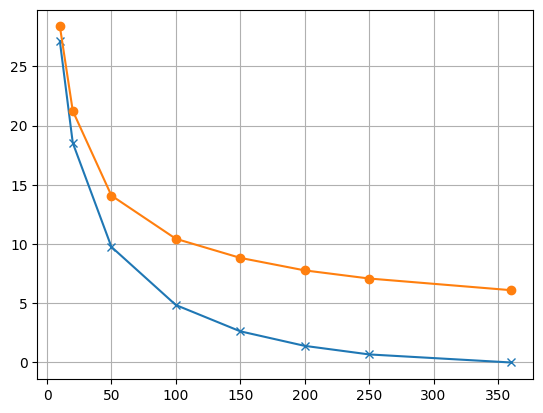

In [3]:
import numpy as np; import matplotlib.pyplot as plt; from sklearn.decomposition import PCA
from sklearn.datasets import fetch_olivetti_faces; from sklearn.model_selection import train_test_split
X, y = fetch_olivetti_faces(return_X_y=True); test_size = 0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, random_state=23)
max_K = len(X_train); Ks = np.array([10, 20, 50, 100, 150, 200, 250, max_K])
L_train = np.empty_like(Ks, dtype=float); L_test = np.empty_like(Ks, dtype=float)
for i, K in enumerate(Ks):
    pca = PCA(n_components=K).fit(X_train)
    Z_train = pca.transform(X_train); hX_train = pca.inverse_transform(Z_train)
    L_train[i] = np.square(X_train - hX_train).sum(axis=1).mean()
    Z_test = pca.transform(X_test); hX_test = pca.inverse_transform(Z_test)
    L_test[i] = np.square(X_test - hX_test).sum(axis=1).mean()
plt.grid(True); plt.plot(Ks, L_train, '-x', Ks, L_test, '-o');

**Eigenimages:** $\;$ las componentes principales pueden verse como imágenes base que se combinan linealmente para formar cualquier imagen de la tarea

**Ejemplo (cont.):** $\;$ primeras **eigenfaces** de olivetti; los píxeles relevantes se hallan en las regiones (relativamente) más brillantes

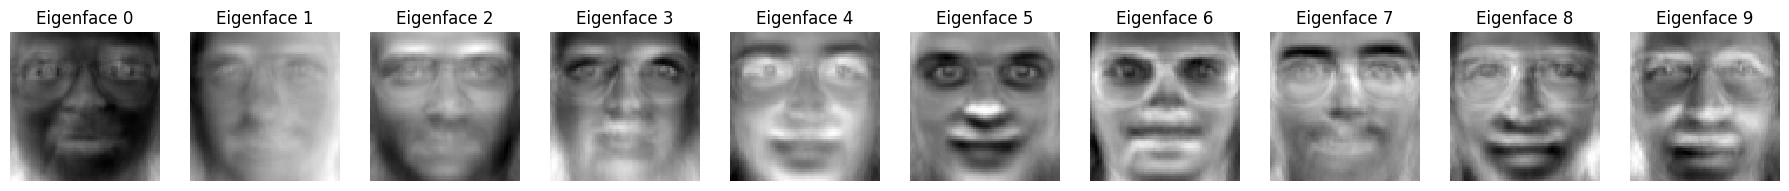

In [4]:
import numpy as np; import matplotlib.pyplot as plt; from sklearn.decomposition import PCA
from sklearn.datasets import fetch_olivetti_faces; X, y = fetch_olivetti_faces(return_X_y=True)
K = 10; pca = PCA(n_components=K).fit(X); nrows, ncols = 1, 10
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 18*nrows/ncols), constrained_layout=True)
for i in range(min(K, nrows * ncols)):
    ax = axs.flat[i]; ax.set_axis_off(); ax.set_title(f"Eigenface {i}")
    ax.imshow(pca.components_[i, :].reshape((64, 64)), cmap=plt.cm.gray, interpolation="none")

**Visualización de imágenes reconstruidas:** $\;$ la calidad de PCA con el $K$ escogido puede valorarse mediante visualización de imágenes reconstruidas

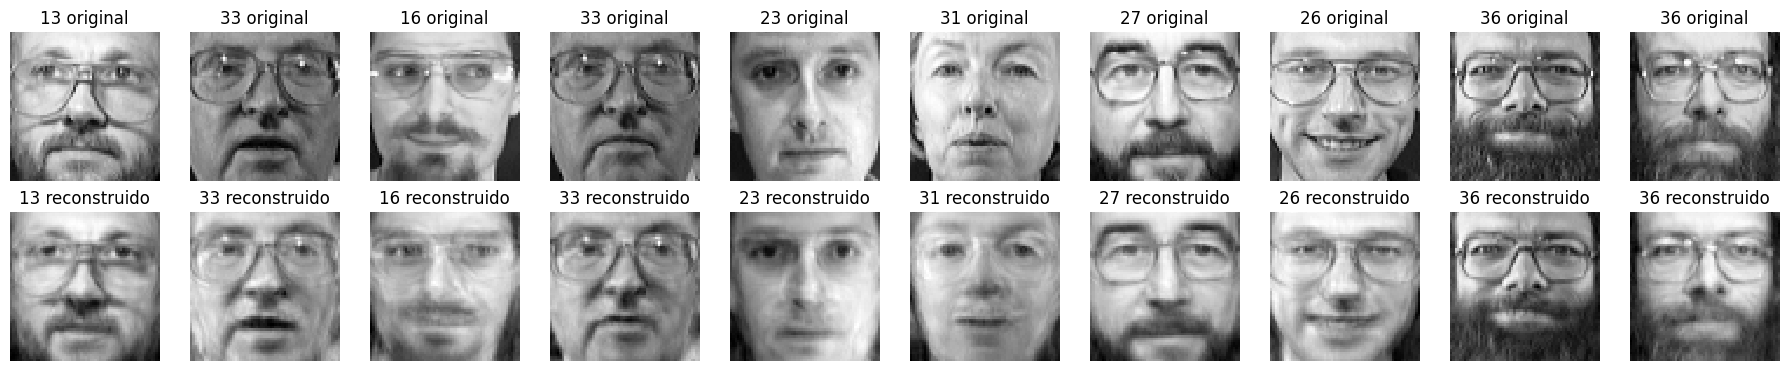

In [5]:
import numpy as np;
import matplotlib.pyplot as plt; 
from sklearn.decomposition import PCA

from sklearn.datasets import fetch_olivetti_faces;
from sklearn.model_selection import train_test_split

X, y = fetch_olivetti_faces(return_X_y=True); test_size = 0.1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, random_state=23)
K = 100; pca = PCA(n_components=K).fit(X_train)
Z_test = pca.transform(X_test); hX_test = pca.inverse_transform(Z_test); ncols = 10
fig, axs = plt.subplots(nrows=2, ncols=10, figsize=(18, 18*2/ncols), constrained_layout=True)
for i in range(ncols):
    ax = axs.flat[i]; ax.set_axis_off(); ax.set_title(f"{y_test[i]} original")
    ax.imshow(X_test[i, :].reshape((64, 64)), cmap=plt.cm.gray, interpolation="none")
    ax = axs.flat[ncols + i]; ax.set_axis_off(); ax.set_title(f"{y_test[i]} reconstruido")
    ax.imshow(hX_test[i, :].reshape((64, 64)), cmap=plt.cm.gray, interpolation="none")

**Ejercicio:** $\;$ escoge una tarea de clasificación de imágenes, por ejemplo digits o mnist_784 (id 554 de openml), estima un valor de $K$ razonable a partir del comportamiento del error de reconstrucción (empírico y poblacional) en función de $\,K\,$ y la visualización de eigenimages e imágenes reconstruidas

### Solución: digits

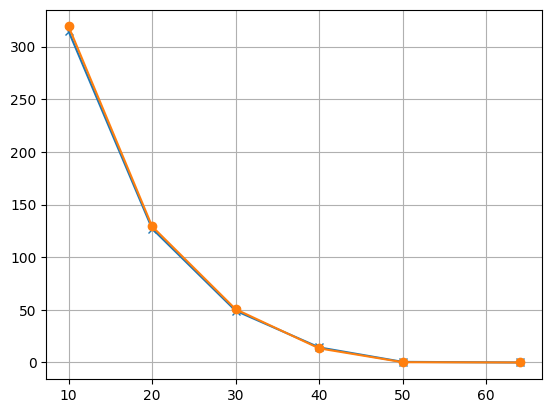

In [6]:
import numpy as np; import matplotlib.pyplot as plt; from sklearn.decomposition import PCA
from sklearn.datasets import load_digits; from sklearn.model_selection import train_test_split
X, y = load_digits(return_X_y=True); test_size = 0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, random_state=23)
max_K = min(X.shape[0], X.shape[1]); Ks = np.array([10, 20, 30, 40, 50, max_K])
L_train = np.empty_like(Ks, dtype=float); L_test = np.empty_like(Ks, dtype=float)
for i, K in enumerate(Ks):
    pca = PCA(n_components=K).fit(X_train)
    Z_train = pca.transform(X_train); hX_train = pca.inverse_transform(Z_train)
    L_train[i] = np.square(X_train - hX_train).sum(axis=1).mean()
    Z_test = pca.transform(X_test); hX_test = pca.inverse_transform(Z_test)
    L_test[i] = np.square(X_test - hX_test).sum(axis=1).mean()
plt.grid(True); plt.plot(Ks, L_train, '-x', Ks, L_test, '-o');

El valor de k razonable es 30, que es donde más o menos empieza a ralentizarse la bajada. (Buscamos un punto de inflexión)

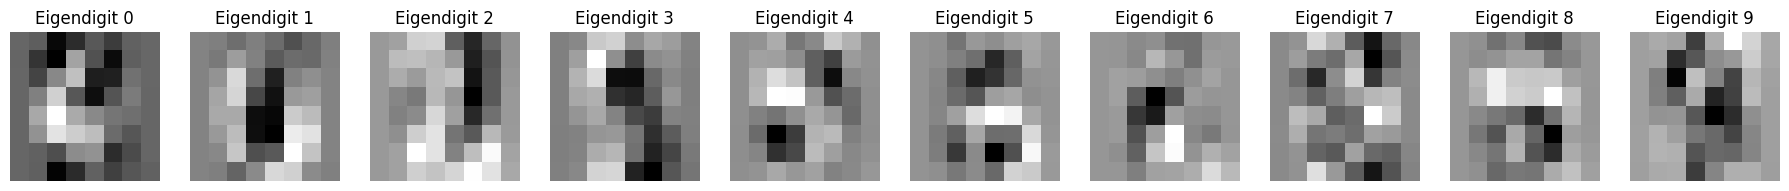

In [18]:
import numpy as np; import matplotlib.pyplot as plt; from sklearn.decomposition import PCA
from sklearn.datasets import load_digits; X, y = load_digits(return_X_y=True)
K = 30; pca = PCA(n_components=K).fit(X); nrows, ncols = 1, 10
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 18*nrows/ncols), constrained_layout=True)
for i in range(min(K, nrows * ncols)):
    ax = axs.flat[i]; ax.set_axis_off(); ax.set_title(f"Eigendigit {i}")
    ax.imshow(pca.components_[i, :].reshape((8, 8)), cmap=plt.cm.gray, interpolation="none")

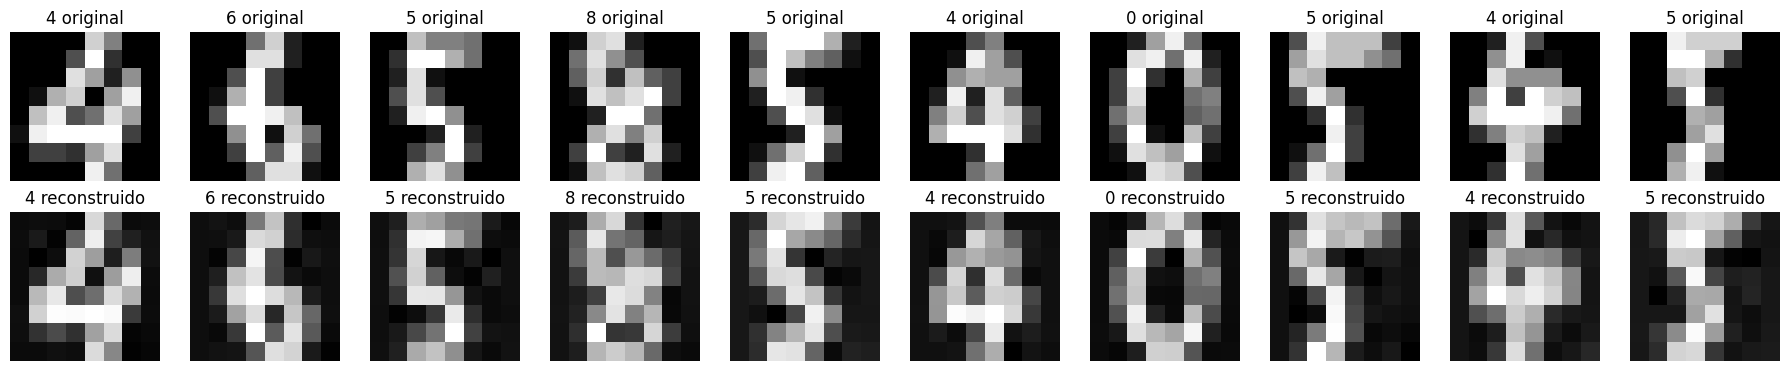

In [21]:
import numpy as np;
import matplotlib.pyplot as plt;  # type: ignore
from sklearn.decomposition import PCA

from sklearn.datasets import load_digits; # type: ignore
from sklearn.model_selection import train_test_split

X, y = load_digits(return_X_y=True); test_size = 0.1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, random_state=23)
K = 30; pca = PCA(n_components=K).fit(X_train)
Z_test = pca.transform(X_test); hX_test = pca.inverse_transform(Z_test); ncols = 10
fig, axs = plt.subplots(nrows=2, ncols=10, figsize=(18, 18*2/ncols), constrained_layout=True)
for i in range(ncols):
    ax = axs.flat[i]; ax.set_axis_off(); ax.set_title(f"{y_test[i]} original")
    ax.imshow(X_test[i, :].reshape((8, 8)), cmap=plt.cm.gray, interpolation="none")
    ax = axs.flat[ncols + i]; ax.set_axis_off(); ax.set_title(f"{y_test[i]} reconstruido")
    ax.imshow(hX_test[i, :].reshape((8, 8)), cmap=plt.cm.gray, interpolation="none")